# **Data-Driven Analysis of Customer Behavior, Marketing Strategies, and Product Performance**

In [ ]:
# Import necessary packages
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import openpyxl

In [ ]:
# Load the datasets
online_sales = pd.read_csv('Online_Sales.csv')
customers_data = pd.read_excel('CustomersData.xlsx')
discount_coupon = pd.read_csv('Discount_Coupon.csv')
marketing_spend = pd.read_csv('Marketing_Spend.csv')
tax_amount = pd.read_excel('Tax_amount.xlsx')

In [ ]:
# Quick overview of each dataset's head to understand their structure
datasets_head = {
    "Online Sales": online_sales.head(),
    "Customers Data": customers_data.head(),
    "Discount Coupon": discount_coupon.head(),
    "Marketing Spend": marketing_spend.head(),
    "Tax Amount": tax_amount.head()
}
print(datasets_head)

{'Online Sales':    CustomerID  Transaction_ID Transaction_Date     Product_SKU  \
0       17850           16679         1/1/2019  GGOENEBJ079499   
1       17850           16680         1/1/2019  GGOENEBJ079499   
2       17850           16681         1/1/2019  GGOEGFKQ020399   
3       17850           16682         1/1/2019  GGOEGAAB010516   
4       17850           16682         1/1/2019  GGOEGBJL013999   

                                 Product_Description Product_Category  \
0  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
1  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
2              Google Laptop and Cell Phone Stickers           Office   
3  Google Men's 100% Cotton Short Sleeve Hero Tee...          Apparel   
4                    Google Canvas Tote Natural/Navy             Bags   

   Quantity  Avg_Price  Delivery_Charges Coupon_Status  
0         1     153.71               6.5          Used  
1         1     153.71           

In [ ]:
# Display column information for each dataset
datasets_column_info = {
    "Online Sales": online_sales.info(),
    "Customers Data": customers_data.info(),
    "Discount Coupon": discount_coupon.info(),
    "Marketing Spend": marketing_spend.info(),
    "Tax Amount": tax_amount.info()
}

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52924 entries, 0 to 52923
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           52924 non-null  int64  
 1   Transaction_ID       52924 non-null  int64  
 2   Transaction_Date     52924 non-null  object 
 3   Product_SKU          52924 non-null  object 
 4   Product_Description  52924 non-null  object 
 5   Product_Category     52924 non-null  object 
 6   Quantity             52924 non-null  int64  
 7   Avg_Price            52924 non-null  float64
 8   Delivery_Charges     52924 non-null  float64
 9   Coupon_Status        52924 non-null  object 
dtypes: float64(2), int64(3), object(5)
memory usage: 4.0+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1468 entries, 0 to 1467
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CustomerID     1468 non-null   i

In [ ]:
# Display information for each dataset
datasets_info = {
    "Online Sales": online_sales.describe(),
    "Customers Data": customers_data.describe(),
    "Discount Coupon": discount_coupon.describe(),
    "Marketing Spend": marketing_spend.describe(),
    "Tax Amount": tax_amount.describe()
}
print(datasets_info)

{'Online Sales':         CustomerID  Transaction_ID      Quantity     Avg_Price  \
count  52924.00000    52924.000000  52924.000000  52924.000000   
mean   15346.70981    32409.825675      4.497638     52.237646   
std     1766.55602     8648.668977     20.104711     64.006882   
min    12346.00000    16679.000000      1.000000      0.390000   
25%    13869.00000    25384.000000      1.000000      5.700000   
50%    15311.00000    32625.500000      1.000000     16.990000   
75%    16996.25000    39126.250000      2.000000    102.130000   
max    18283.00000    48497.000000    900.000000    355.740000   

       Delivery_Charges  
count      52924.000000  
mean          10.517630  
std           19.475613  
min            0.000000  
25%            6.000000  
50%            6.000000  
75%            6.500000  
max          521.360000  , 'Customers Data':          CustomerID  Tenure_Months
count   1468.000000    1468.000000
mean   15314.386240      25.912125
std     1744.000367      13.95

In [ ]:
datasets_duplicated = {
     "Online Sales": online_sales.duplicated().sum(),
    "Customers Data": customers_data.duplicated().sum(),
    "Discount Coupon": discount_coupon.duplicated().sum(),
    "Marketing Spend": marketing_spend.duplicated().sum(),
    "Tax Amount": tax_amount.duplicated().sum()
}
print(datasets_duplicated)

{'Online Sales': 0, 'Customers Data': 0, 'Discount Coupon': 0, 'Marketing Spend': 0, 'Tax Amount': 0}


# **Data cleaning and preparation**

In [ ]:
# Convert date columns to datetime
online_sales['Transaction_Date'] = pd.to_datetime(online_sales['Transaction_Date'])
marketing_spend['Date'] = pd.to_datetime(marketing_spend['Date'])

# Check the heads
print(online_sales['Transaction_Date'].head())
print(marketing_spend['Date'].head())

0   2019-01-01
1   2019-01-01
2   2019-01-01
3   2019-01-01
4   2019-01-01
Name: Transaction_Date, dtype: datetime64[ns]
0   2019-01-01
1   2019-01-02
2   2019-01-03
3   2019-01-04
4   2019-01-05
Name: Date, dtype: datetime64[ns]


In [ ]:
# Merge Online Sales with Tax Amount on Product Category
online_sales = online_sales.merge(tax_amount, on='Product_Category', how='left')

# Merge Online Sales with Customers Data on customerID
online_sales = online_sales.merge(customers_data, on='CustomerID', how='left')

# Merge Discount Coupon for discount details for specific month and product category
discount_coupon['Month'] = pd.to_datetime(discount_coupon['Month'], format='%b').dt.month
online_sales['Transaction_Month'] = online_sales['Transaction_Date'].dt.month
online_sales = online_sales.merge(discount_coupon,
                                   left_on=['Product_Category', 'Transaction_Month'],
                                   right_on=['Product_Category', 'Month'],
                                   how='left')

# **Data Analysis for Business Objectives**

## **Revenue for Each Transaction**

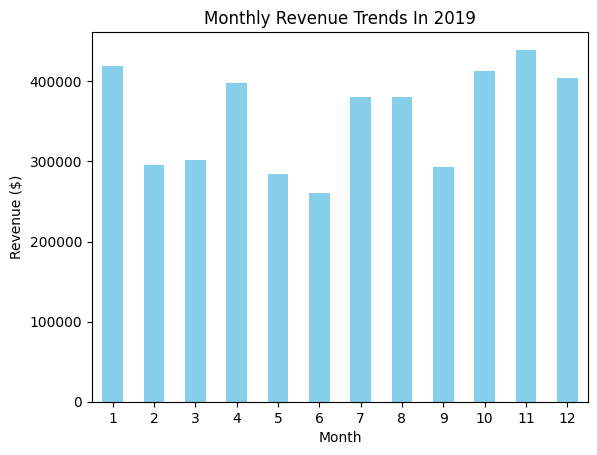

Total Revenue:  4272053.1482167
Average Order Value:  81.33525908568845


In [ ]:
# Calculate invoice value according to the company's formula
online_sales['Discount_Applied'] = online_sales['Discount_pct'] / 100
online_sales['GST_Applied'] = online_sales['GST'] / 100

online_sales['Invoice_Value'] = (
    online_sales['Quantity'] * online_sales['Avg_Price'] * (1 - online_sales['Discount_Applied']) *
    (1 + online_sales['GST_Applied']) + online_sales['Delivery_Charges']
)

# Calculate total revenue
total_revenue = online_sales['Invoice_Value'].sum()

# Calculate average order value
average_order_value = online_sales['Invoice_Value'].mean()

# Revenue by month
revenue_by_month = online_sales.groupby(online_sales['Transaction_Month']).agg({'Invoice_Value': 'sum'})

# Visualize Monthly Revenue Trends
revenue_by_month.plot(kind='bar', legend=False, color='skyblue')
plt.title('Monthly Revenue Trends In 2019')
plt.ylabel('Revenue ($)')
plt.xlabel('Month')
plt.xticks(rotation=0)
plt.show()

# Display summary metrics
print("Total Revenue: ", total_revenue)
print("Average Order Value: ", average_order_value)


## **Monthly Customer Acquisition**

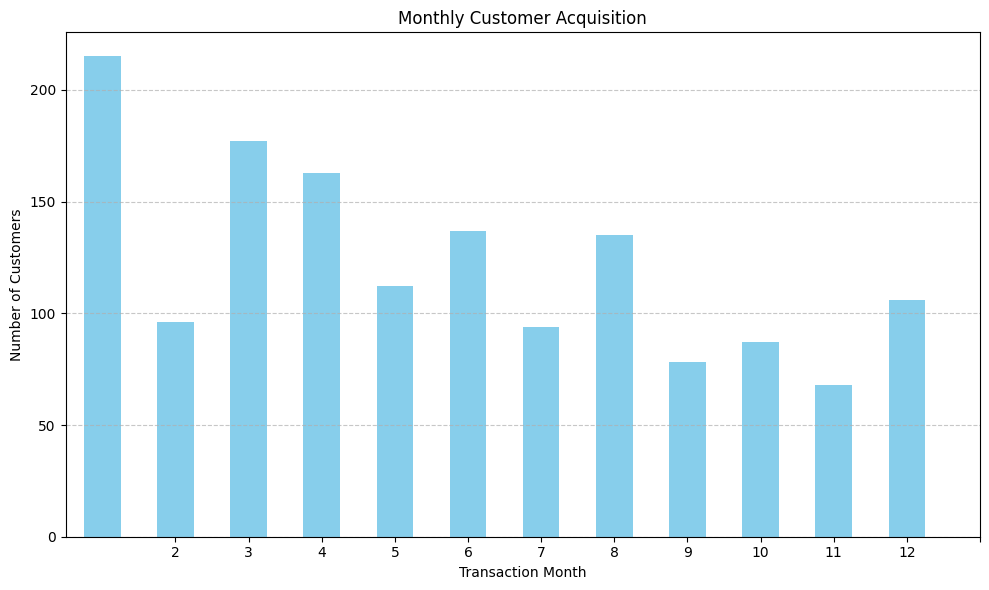

In [ ]:
customer_first_purchase = online_sales.groupby('CustomerID')['Transaction_Month'].min()
monthly_customer_acquisition = customer_first_purchase.value_counts().sort_index()

# Creating the bar chart
plt.figure(figsize=(10, 6))
monthly_customer_acquisition.plot(kind='bar', legend=False, color='skyblue')
plt.title("Monthly Customer Acquisition")
plt.xlabel("Transaction Month")
plt.ylabel("Number of Customers")
plt.xticks(range(1, 13))
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Display the chart
plt.show()

## **Month Over Month Customer Retention**

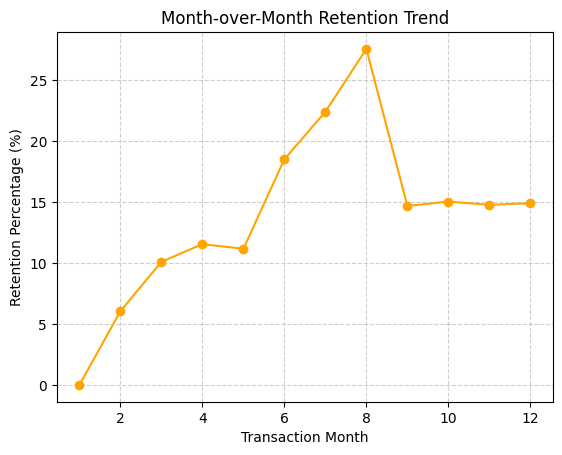

In [ ]:
# Mapping customers to their transaction months
customers_by_month = online_sales.groupby('Transaction_Month')['CustomerID'].apply(set)

# Shift the customers_by_month Series to get previous month's customers
prev_customers = customers_by_month.shift(1)

# Calculate retention percentage
mom_retention = customers_by_month.combine(
    prev_customers,
    lambda current, previous: len(current & previous) / len(previous) * 100 if previous else 0
)

# Convert to DataFrame
mom_retention_df = mom_retention.reset_index(name='MoM_Retention')

# Plot the retention trend as a line chart
plt.plot(mom_retention_df['Transaction_Month'], mom_retention_df['MoM_Retention'], marker='o', color='orange')
plt.title("Month-over-Month Retention Trend")
plt.xlabel("Transaction Month")
plt.ylabel("Retention Percentage (%)")
plt.grid(True, linestyle='--', alpha=0.6)

# Display the chart
plt.show()

## **Revenue from Existing vs. New Customers**

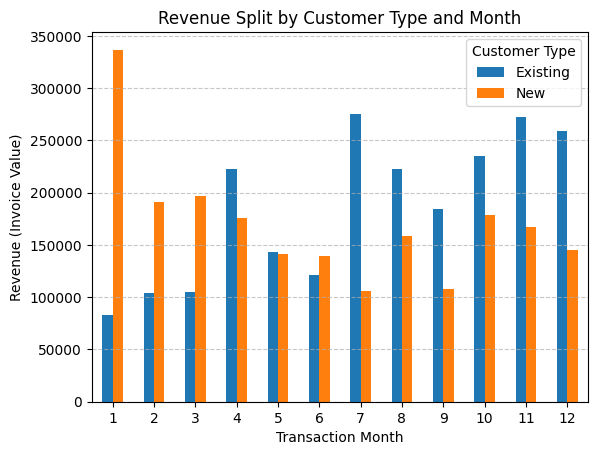

In [ ]:
# Get customers' first purchase date
online_sales['First_Purchase_Date'] = online_sales.groupby('CustomerID')['Transaction_Date'].transform('min')
# Function to classify the customers
def classify_customer(row):
    if row['Transaction_Date'] == row['First_Purchase_Date']:
        return 'New'
    else:
        return 'Existing'

online_sales['Customer_Type'] = online_sales.apply(classify_customer, axis=1)

# Split the revenue between the customers
revenue_split = online_sales.groupby([online_sales['Transaction_Month'], 'Customer_Type'])['Invoice_Value'].sum().unstack()

# Plotting the results
revenue_split.plot(kind='bar')
plt.title("Revenue Split by Customer Type and Month")
plt.xlabel("Transaction Month")
plt.ylabel("Revenue (Invoice Value)")
plt.legend(title="Customer Type")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the chart
plt.show()

## **Role of Discounts in Revenue**

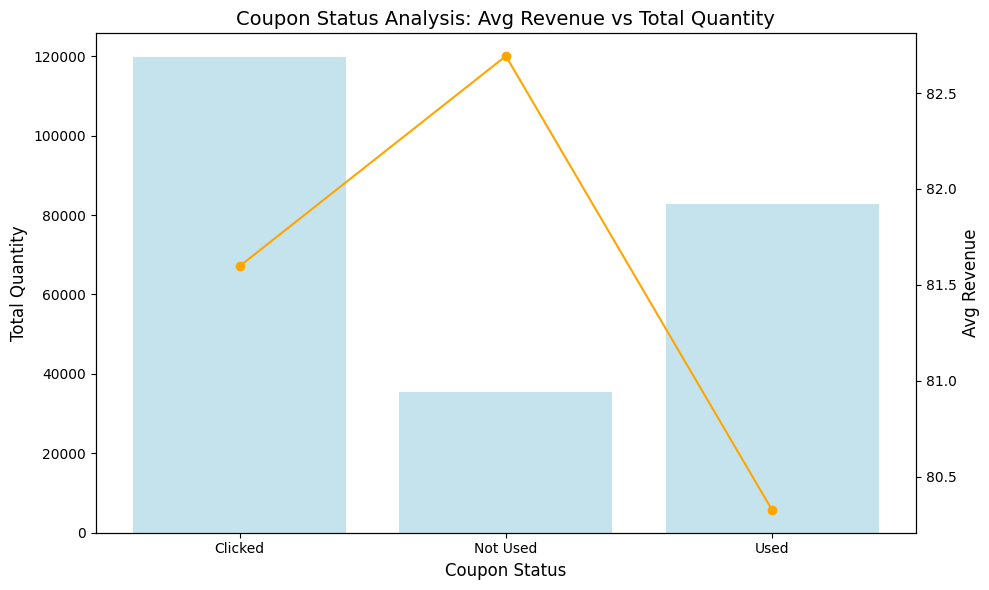

In [ ]:
discount_analysis = online_sales.groupby('Coupon_Status').agg({
    'Invoice_Value': 'mean',
    'Quantity': 'sum'
}).rename(columns={'Invoice_Value': 'Avg_Revenue', 'Quantity': 'Total_Quantity'})

# Plot Total Quantity as bar chart and Avg Revenue as line chart
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar chart for Total Quantity
ax1.bar(discount_analysis.index, discount_analysis['Total_Quantity'], color='lightblue', alpha=0.7, label='Total Quantity')
ax1.set_ylabel("Total Quantity", fontsize=12, color='black')
ax1.set_xlabel("Coupon Status", fontsize=12)
ax1.tick_params(axis='y', labelcolor='black')

# Line chart for Avg Revenue
ax2 = ax1.twinx()
ax2.plot(discount_analysis.index, discount_analysis['Avg_Revenue'], color='orange', marker='o', label='Avg Revenue')
ax2.set_ylabel("Avg Revenue", fontsize=12)
ax2.tick_params(axis='y', labelcolor='black')

# Title and Legends
plt.title("Coupon Status Analysis: Avg Revenue vs Total Quantity", fontsize=14)
fig.tight_layout()

# Display the chart
plt.show()

## **KPI Analysis by Category**

<Figure size 800x500 with 0 Axes>

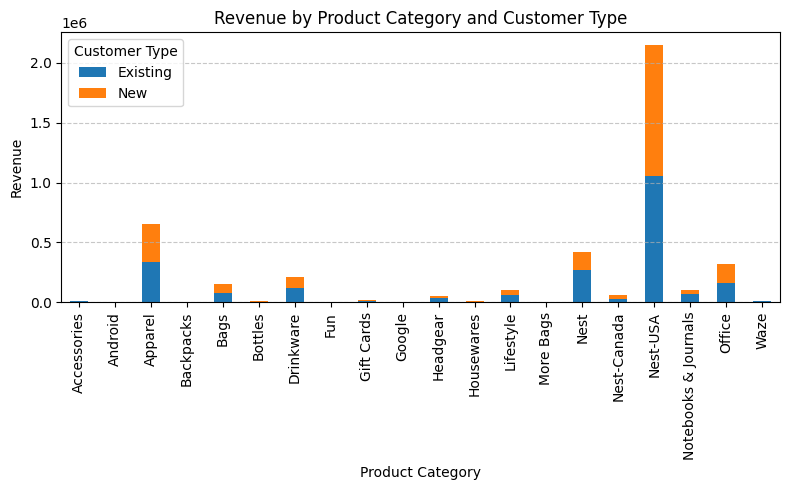

<Figure size 800x500 with 0 Axes>

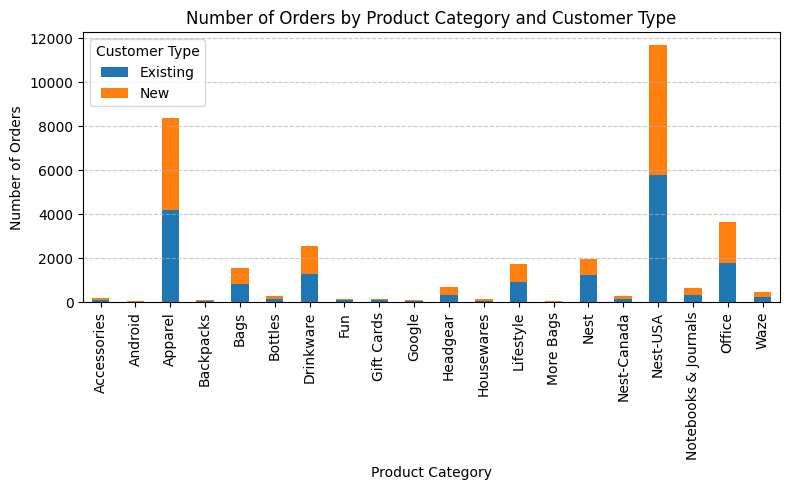

<Figure size 800x500 with 0 Axes>

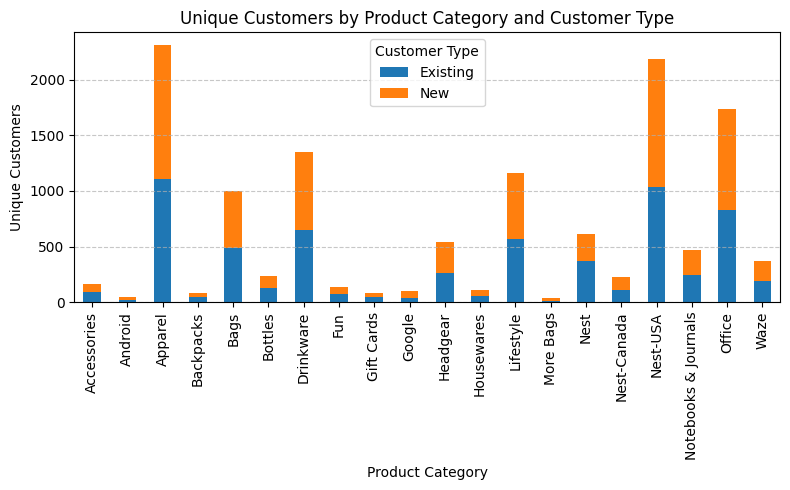

<Figure size 800x500 with 0 Axes>

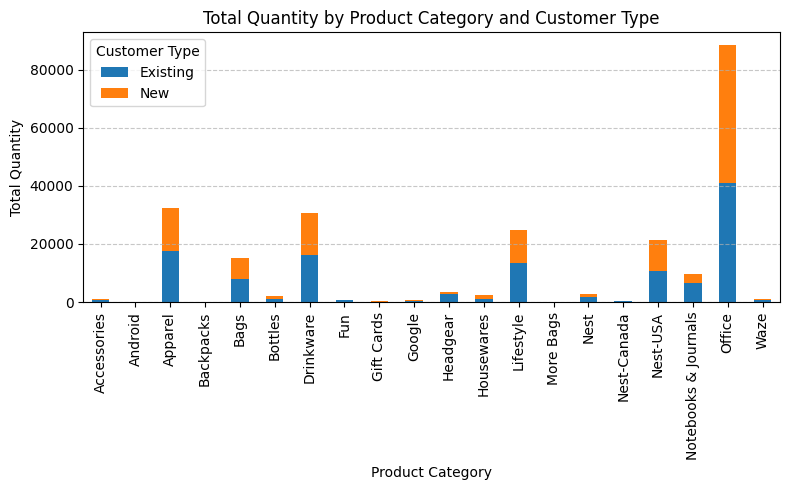

<Figure size 800x500 with 0 Axes>

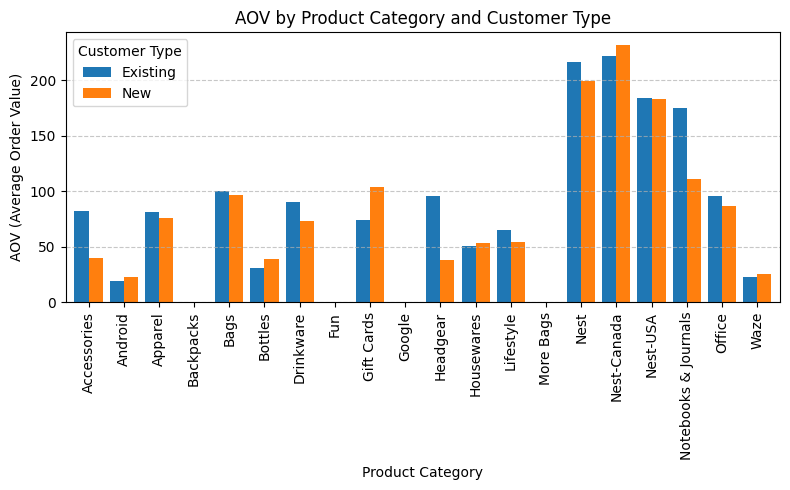

In [ ]:
# Revenue, orders, AOV, customer count, quantity by Category, Month, and Customer Type
kpi_by_category_month = online_sales.groupby(['Product_Category', online_sales['Transaction_Month'], 'Customer_Type']).agg({
    'Invoice_Value': 'sum',
    'Transaction_ID': 'nunique',
    'CustomerID': 'nunique',
    'Quantity': 'sum'
}).rename(columns={
    'Invoice_Value': 'Revenue',
    'Transaction_ID': 'Number_of_Orders',
    'CustomerID': 'Unique_Customers',
    'Quantity': 'Total_Quantity'
})

kpi_by_category_month['AOV'] = kpi_by_category_month['Revenue'] / kpi_by_category_month['Number_of_Orders']

# Reset the index for easier plotting
kpi_reset = kpi_by_category_month.reset_index()

# Plot all KPIs (Revenue, Number of Orders, Unique Customers, Total Quantity, AOV) by product category, month and customer type
kpis = ['Revenue', 'Number_of_Orders', 'Unique_Customers', 'Total_Quantity']

for kpi in kpis:
    # Pivot the data for visualization
    kpi_pivot_category = kpi_reset.pivot_table(
        index='Product_Category',
        columns='Customer_Type',
        values=kpi,
        aggfunc='sum'
    )

    # Plotting the KPI trends by Product Category
    plt.figure(figsize=(8, 5))
    kpi_pivot_category.plot(kind='bar', stacked=True, figsize=(8,5))
    plt.title(f"{kpi.replace('_', ' ')} by Product Category and Customer Type")
    plt.xlabel("Product Category")
    plt.ylabel(kpi.replace('_', ' '))
    plt.xticks(rotation=90)
    plt.legend(title="Customer Type")
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Display the chart
    plt.tight_layout()
    plt.show()

aov_pivot = kpi_reset.pivot_table(
    index='Product_Category',
    columns='Customer_Type',
    values='AOV'
)

# Plotting AOV trends for Product Category and Customer Type
plt.figure(figsize=(8, 5))
aov_pivot.plot(kind='bar', figsize=(8, 5), width=0.8)
plt.title("AOV by Product Category and Customer Type")
plt.xlabel("Product Category")
plt.ylabel("AOV (Average Order Value)")
plt.xticks(rotation=90)
plt.legend(title="Customer Type")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the chart
plt.tight_layout()
plt.show()

## **KPI Analysis by Time**

<Figure size 800x500 with 0 Axes>

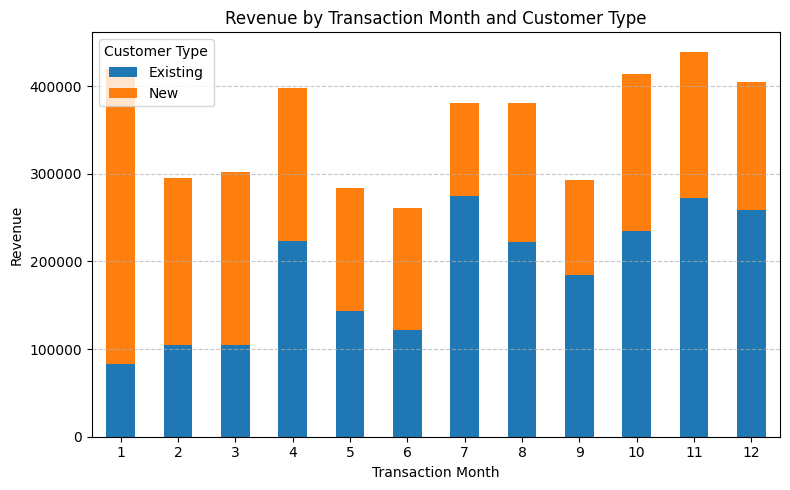

<Figure size 800x500 with 0 Axes>

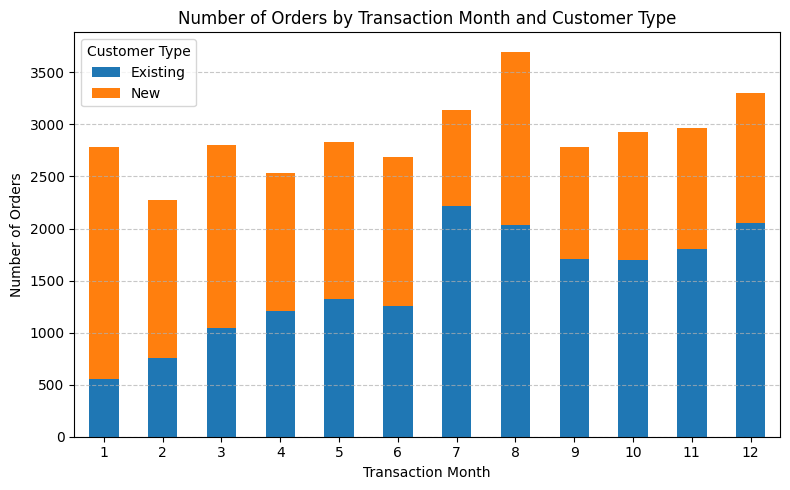

<Figure size 800x500 with 0 Axes>

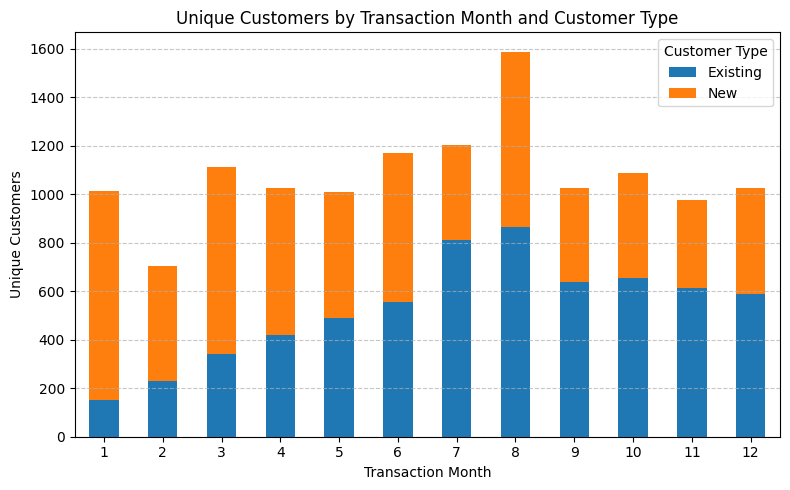

<Figure size 800x500 with 0 Axes>

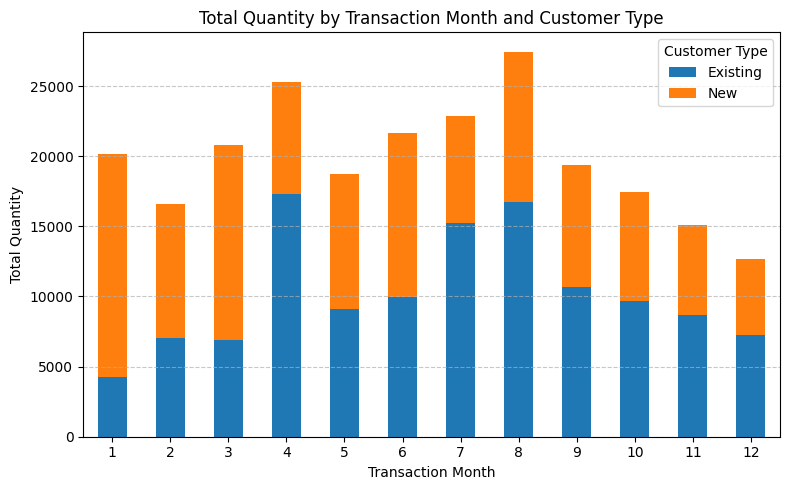

<Figure size 800x500 with 0 Axes>

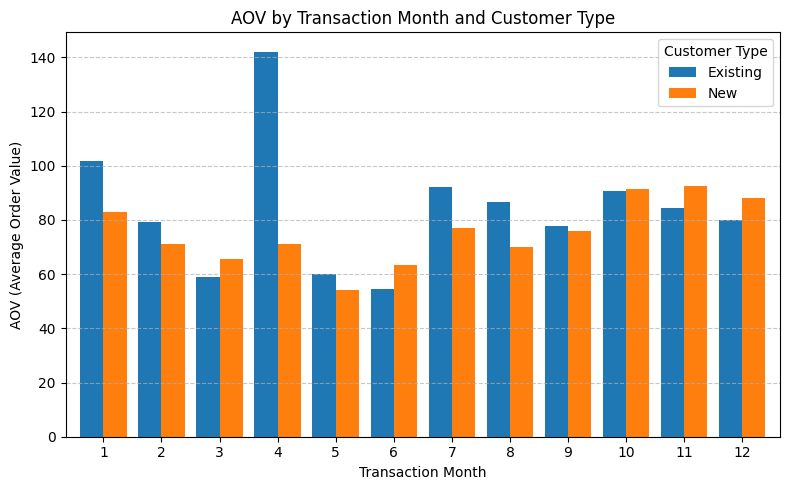

In [ ]:
for kpi in kpis:
    # Pivot the data for visualization
    kpi_pivot_month = kpi_reset.pivot_table(
        index='Transaction_Month',
        columns='Customer_Type',
        values=kpi,
        aggfunc='sum'
    )

    # Plotting the KPI trends by Transaction Month
    plt.figure(figsize=(8, 5))
    kpi_pivot_month.plot(kind='bar', stacked=True, figsize=(8,5))
    plt.title(f"{kpi.replace('_', ' ')} by Transaction Month and Customer Type")
    plt.xlabel("Transaction Month")
    plt.ylabel(kpi.replace('_', ' '))
    plt.xticks(rotation=0)
    plt.legend(title="Customer Type")
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Display the chart
    plt.tight_layout()
    plt.show()

aov_pivot = kpi_reset.pivot_table(
    index='Transaction_Month',
    columns='Customer_Type',
    values='AOV'
)

# Plotting AOV trends for Transaction Month and Customer Type
plt.figure(figsize=(8, 5))
aov_pivot.plot(kind='bar', figsize=(8, 5), width=0.8)
plt.title("AOV by Transaction Month and Customer Type")
plt.xlabel("Transaction Month")
plt.ylabel("AOV (Average Order Value)")
plt.xticks(rotation=0)
plt.legend(title="Customer Type")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the chart
plt.tight_layout()
plt.show()

## **Trends and Seasonality Analysis by Location/Category/Month**

<Figure size 1600x800 with 0 Axes>

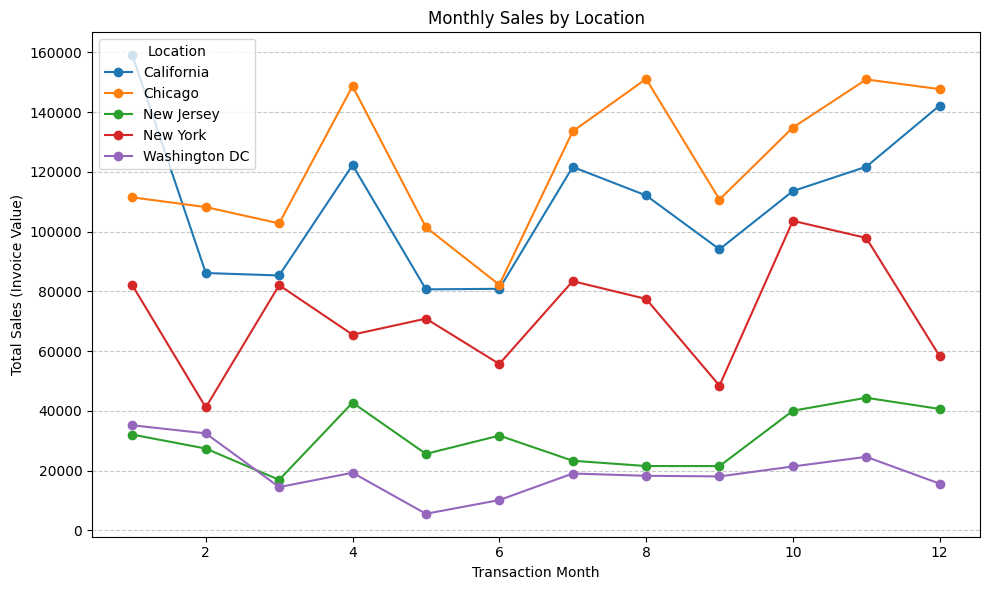

In [ ]:
sales_by_location = online_sales.groupby(['Location', online_sales['Transaction_Month']])['Invoice_Value'].sum()

# Reset index to prepare data for plotting
sales_by_location_reset = sales_by_location.reset_index()

# Prepare the data for line plot
sales_pivot = sales_by_location_reset.pivot(
    index='Transaction_Month',
    columns='Location',
    values='Invoice_Value'
)

# Plot the line chart
plt.figure(figsize=(16, 8))
sales_pivot.plot(kind='line', marker='o', figsize=(10, 6))
plt.title("Monthly Sales by Location")
plt.xlabel("Transaction Month")
plt.ylabel("Total Sales (Invoice Value)")
plt.legend(title="Location")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Display the plot
plt.show()

## **Daily Sales Trends**

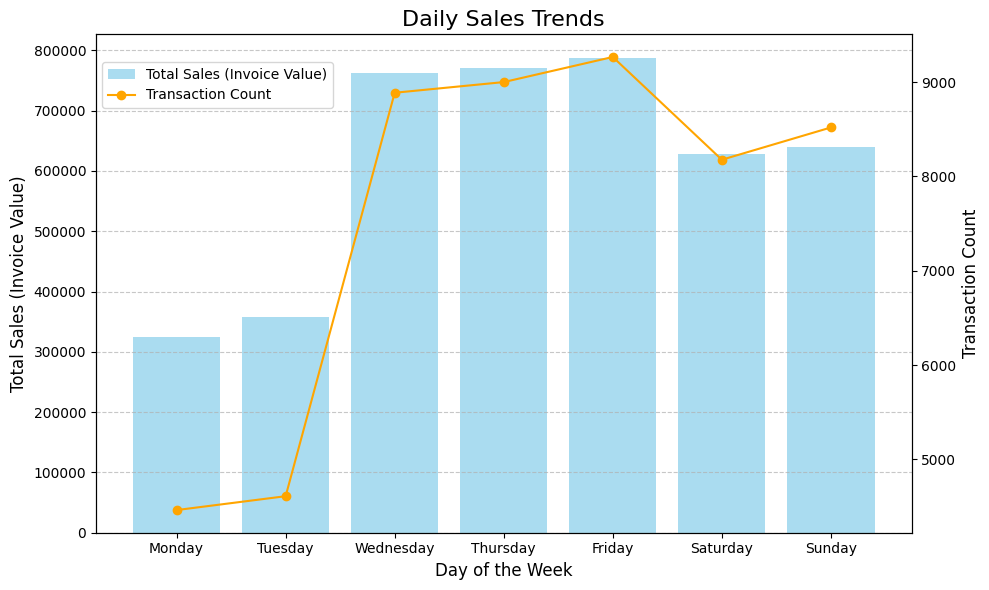

In [ ]:
daily_sales_trends = online_sales.groupby(online_sales['Transaction_Date'].dt.dayofweek).agg({
    'Invoice_Value': 'sum',
    'Transaction_ID': 'count'
}).rename(index={0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'})

days = daily_sales_trends.index
sales = daily_sales_trends['Invoice_Value']
transactions = daily_sales_trends['Transaction_ID']

# Plot the combined bar and line chart
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar chart for total sales (Invoice_Value)
ax1.bar(days, sales, color='skyblue', alpha=0.7, label='Total Sales (Invoice Value)')
ax1.set_ylabel('Total Sales (Invoice Value)', fontsize=12)
ax1.set_xlabel('Day of the Week', fontsize=12)
ax1.tick_params(axis='y')
ax1.set_title('Daily Sales Trends', fontsize=16)

# Line chart for transaction count (Transaction_ID)
ax2 = ax1.twinx()
ax2.plot(days, transactions, color='orange', marker='o', label='Transaction Count')
ax2.set_ylabel('Transaction Count', fontsize=12)
ax2.tick_params(axis='y')
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9), fontsize=10)
plt.xticks(rotation=45)
ax1.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Display the chart
plt.show()

## **Revenue, Marketing Spend, and Percentages by Month**

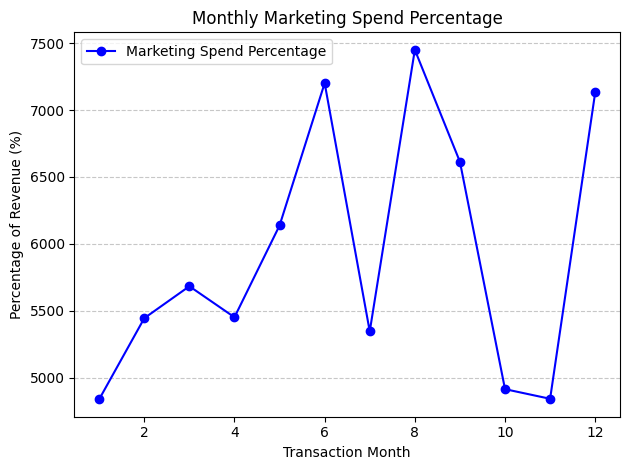

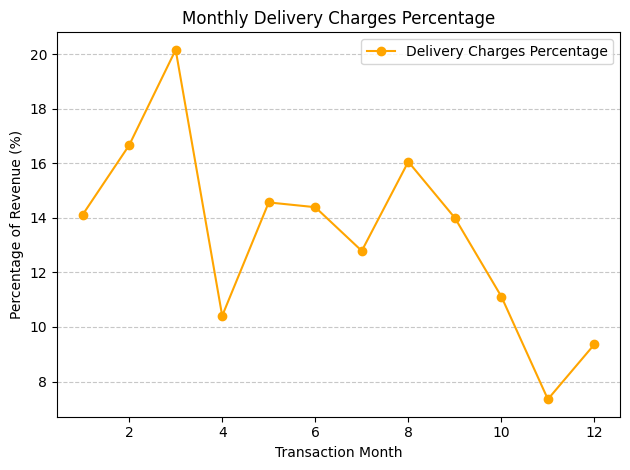

In [ ]:
marketing_revenue_analysis = online_sales.merge(
    marketing_spend, left_on='Transaction_Month',
    right_on=marketing_spend['Date'].dt.month, how='left')

monthly_marketing_analysis = marketing_revenue_analysis.groupby('Transaction_Month').agg({
    'Offline_Spend': 'sum',
    'Online_Spend': 'sum',
    'Invoice_Value': 'sum',
    'Delivery_Charges': 'sum'
}).reset_index()

monthly_marketing_analysis['Marketing_Spend_Percentage'] = (
    (monthly_marketing_analysis['Offline_Spend'] + monthly_marketing_analysis['Online_Spend'])
    / monthly_marketing_analysis['Invoice_Value'] * 100
)
monthly_marketing_analysis['Delivery_Charges_Percentage'] = (
    monthly_marketing_analysis['Delivery_Charges'] / monthly_marketing_analysis['Invoice_Value'] * 100
)

plt.plot(
    monthly_marketing_analysis['Transaction_Month'],
    monthly_marketing_analysis['Marketing_Spend_Percentage'],
    marker='o',
    linestyle='-',
    color='blue',
    label='Marketing Spend Percentage'
)
plt.title("Monthly Marketing Spend Percentage")
plt.xlabel("Transaction Month")
plt.ylabel("Percentage of Revenue (%)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()

plt.plot(
    monthly_marketing_analysis['Transaction_Month'],
    monthly_marketing_analysis['Delivery_Charges_Percentage'],
    marker='o',
    linestyle='-',
    color='orange',
    label='Delivery Charges Percentage'
)
plt.title("Monthly Delivery Charges Percentage")
plt.xlabel("Transaction Month")
plt.ylabel("Percentage of Revenue (%)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()

## **Marketing Spend Impact on Revenue (Correlation Analysis)**

               Offline_Spend  Online_Spend  Invoice_Value
Offline_Spend       1.000000      0.346527       0.040119
Online_Spend        0.346527      1.000000       0.023149
Invoice_Value       0.040119      0.023149       1.000000


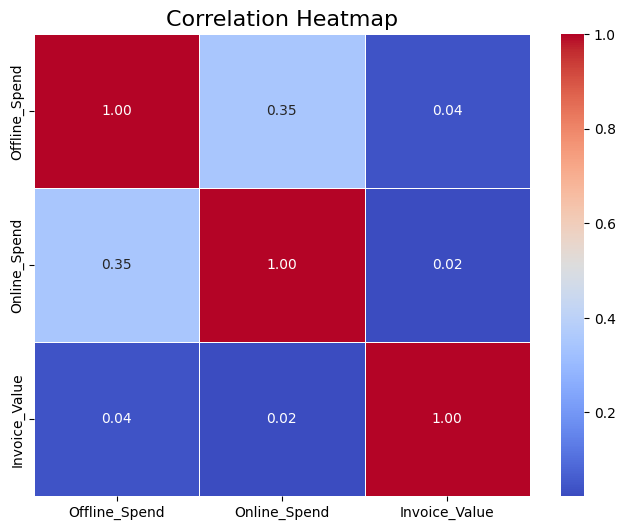

In [ ]:
marketing_revenue_correlation = marketing_revenue_analysis[['Offline_Spend', 'Online_Spend', 'Invoice_Value']].corr()
print(marketing_revenue_correlation)

plt.figure(figsize=(8, 6))
sns.heatmap(marketing_revenue_correlation, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

## **Product Purchase Analysis**

In [ ]:
top_products_by_quantity = online_sales.groupby('Product_Description').agg({
    'Quantity': 'sum'
}).sort_values(by='Quantity', ascending=False).head(10)

top_products_by_transactions = online_sales.groupby('Product_Description').agg({
    'Transaction_ID': 'count'
}).sort_values(by='Transaction_ID', ascending=False).head(10)

top_products_by_sales = online_sales.groupby('Product_Description').agg({
    'Invoice_Value': 'sum'
}).sort_values(by='Invoice_Value', ascending=False).head(10)

top_products_by_transactions.rename(columns={'Transaction_ID': 'Transaction_Count'}, inplace=True)
top_products_by_sales.rename(columns={'Invoice_Value': 'Sales'}, inplace=True)

print(top_products_by_quantity)
print(top_products_by_transactions)
print(top_products_by_sales)

                                        Quantity
Product_Description                             
Maze Pen                                   16234
Google 22 oz Water Bottle                  14282
Google Sunglasses                          11452
Sport Bag                                   7321
Google Metallic Notebook Set                6496
Google Laptop and Cell Phone Stickers       5847
Google Kick Ball                            5549
Recycled Paper Journal Set                  5381
Nest Cam Outdoor Security Camera - USA      5206
Foam Can and Bottle Cooler                  5098
                                                    Transaction_Count
Product_Description                                                  
Nest Learning Thermostat 3rd Gen-USA - Stainles...               3511
Nest Cam Outdoor Security Camera - USA                           3328
Nest Cam Indoor Security Camera - USA                            3230
Google Sunglasses                                             

# **Performing Customer Segmentation**
- Heuristic (Value based, RFM) – Divide the customers into Premium, Gold, Silver,
Standard customers and define strategy on the same.
- Scientific (Using K-Means) & Understand the profiles. Define strategy for each
segment.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Merge Online Sales with Tax Amount on Product Category
online_sales_tax = online_sales.merge(tax_amount, on='Product_Category', how='left')

In [ ]:
# Merge Online Sales with Customers Data on CustomerID
online_sales_combined = online_sales_tax.merge(customers_data, on='CustomerID', how='left')

In [ ]:
# Merge Discount Coupon for discount details for specific month and product category
# discount_coupon['Month'] = pd.to_datetime(discount_coupon['Month'], format='%b').dt.month
online_sales_combined['Transaction_Date'] = pd.to_datetime(online_sales_combined['Transaction_Date'])
online_sales_combined['Transaction_Month'] = online_sales_combined['Transaction_Date'].dt.month
online_sales_combined = online_sales_combined.merge(discount_coupon,
                                  left_on=['Product_Category', 'Transaction_Month'],
                                  right_on=['Product_Category', 'Month'],
                                  how='left')

In [ ]:
# Heuristic Segmentation (RFM Analysis)
# Calculate Recency, Frequency, and Monetary value
current_date = online_sales_combined['Transaction_Date'].max()
rfm_data = online_sales_combined.groupby('CustomerID').agg({
    'Transaction_Date': lambda x: (current_date - x.max()).days,
    'Transaction_ID': 'count',
    'Invoice_Value': 'sum'
}).reset_index()

rfm_data.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

# Display the grouped data
print(rfm_data.head())

   CustomerID  Recency  Frequency      Monetary
0       12346      107          2    171.725887
1       12347       59         60  10603.987888
2       12348       73         23   1341.274742
3       12350       17         17   1080.966849
4       12356      107         36   1648.281319


In [ ]:

# Define thresholds for R, F, and M to segment customers
r_thresholds = [0, 100, 200, 300, float('inf')]
f_thresholds = [0, 40, 70, 100, float('inf')]
m_thresholds = [0, 4000, 7000,10000, float('inf')]

# Assign RFM scores
rfm_data['R_Score'] = pd.cut(rfm_data['Recency'], bins=r_thresholds, labels=False)
rfm_data['F_Score'] = pd.cut(rfm_data['Frequency'], bins=f_thresholds, labels=False)
rfm_data['M_Score'] = pd.cut(rfm_data['Monetary'], bins=m_thresholds, labels=False)

# Combine RFM scores
rfm_data['RFM_Score'] = (rfm_data['R_Score']+1) * 10 + (rfm_data['F_Score']+1) * 10 + (rfm_data['M_Score']+1) * 10
rfm_data.head()


,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score
0,12346,107,2,171.725887,1.0,0,0,40.0
1,12347,59,60,10603.987888,0.0,1,3,70.0
2,12348,73,23,1341.274742,0.0,0,0,30.0
3,12350,17,17,1080.966849,0.0,0,0,30.0
4,12356,107,36,1648.281319,1.0,0,0,40.0


In [ ]:

# Define customer segments
def segment_customer(df):
    if (df['RFM_Score'])  <= 40:
        return 'Standard'
    elif (df['RFM_Score'] > 40) & (df['RFM_Score'] <= 70) :
        return 'Silver'
    elif (df['RFM_Score'] > 70) & (df['RFM_Score'] <= 90) :
        return 'Premium'
    else:
        return 'Gold'

rfm_data['Customer_Segment'] = rfm_data.apply(segment_customer, axis=1)
rfm_data.head()

,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,Customer_Segment
0,12346,107,2,171.725887,1.0,0,0,40.0,Standard
1,12347,59,60,10603.987888,0.0,1,3,70.0,Silver
2,12348,73,23,1341.274742,0.0,0,0,30.0,Standard
3,12350,17,17,1080.966849,0.0,0,0,30.0,Standard
4,12356,107,36,1648.281319,1.0,0,0,40.0,Standard


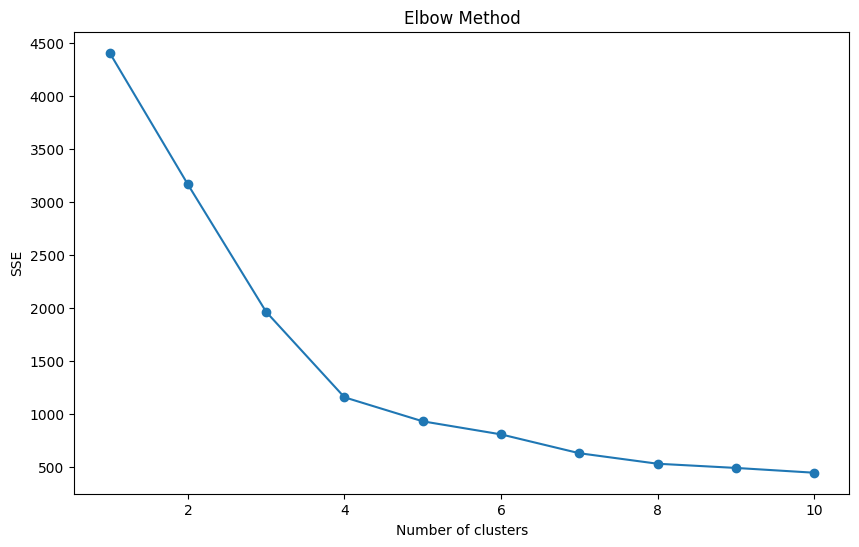

In [ ]:

# Scientific Segmentation (K-Means Clustering)
# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(rfm_data[['Recency', 'Frequency', 'Monetary']])

# Determine the optimal number of clusters using the elbow method
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Elbow Method')
plt.show()


In [ ]:
# Apply K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
rfm_data['Cluster'] = kmeans.fit_predict(data_scaled)

In [ ]:
# Analyze and profile each cluster
cluster_profiles = rfm_data.groupby('Cluster')[['Recency', 'Frequency', 'Monetary']].mean()
cluster_profiles

,Recency,Frequency,Monetary
Cluster,,,
0,77.182058,26.283641,2042.608097
1,254.359347,20.695100,1579.100039
2,84.538961,121.077922,10218.572229
3,29.200000,590.400000,56002.393184


In [ ]:
# Define labels based on cluster characteristics
def label_clusters(cluster):
    if cluster == 2:
        return 'Premium'
    elif cluster == 3:
        return 'Gold'
    elif cluster == 0:
        return 'Silver'
    else:
        return 'Standard'

# Apply the label_clusters function to assign labels
rfm_data['kmean_segment_label'] = rfm_data['Cluster'].apply(label_clusters)
rfm_data.drop(columns='Cluster',inplace=True)
rfm_data['kmean_segment_label'].value_counts()

,count
kmean_segment_label,
Silver,758
Standard,551
Premium,154
Gold,5


In [ ]:
# # Define marketing strategies based on the segments
# strategies = {
#     'Premium': 'High-value customers, focus on loyalty programs and exclusive offers.',
#     'Gold': 'Valuable customers, offer personalized services and discounts.',
#     'Silver': 'Moderate-value customers, provide incentives to increase spending.',
#     'Standard': 'Low-value customers, focus on engagement and retention.'
# }

# # Display the strategies
# for segment, strategy in strategies.items():
#     print(f"{segment} Customers: {strategy}")

# **Predicting Customer Lifetime Value**

Invoice Value=(Quantity×Avg Price)+Delivery Charges
1. Calculate Invoice Value

In [ ]:
# Calculate Invoice Value
online_sales['Invoice_Value'] = (online_sales['Quantity'] * online_sales['Avg_Price']) + online_sales['Delivery_Charges']

# Confirm the column has been added
print(online_sales[['CustomerID', 'Invoice_Value']].head())


   CustomerID  Invoice_Value
0       17850         160.21
1       17850         160.21
2       17850           8.55
3       17850          94.15
4       17850          23.00


Aggregate Data for CLV Calculation

In [ ]:
import pandas as pd
import numpy as np

# Ensure Transaction_Date is in datetime format
online_sales['Transaction_Date'] = pd.to_datetime(online_sales['Transaction_Date'])

# Aggregate customer data
customer_revenue = online_sales.groupby('CustomerID').agg({
    'Invoice_Value': 'sum',  # Total revenue generated
    'Transaction_ID': 'count',  # Frequency of purchases
    'Transaction_Date': lambda x: (x.max() - x.min()).days / 30  # Tenure in months
}).reset_index()

# Rename columns for clarity
customer_revenue.columns = ['CustomerID', 'Revenue', 'Frequency', 'Tenure_Months']

# Preview the aggregated data
print(customer_revenue.head())


   CustomerID   Revenue  Frequency  Tenure_Months
0       12346    180.99          2       0.000000
1       12347  14500.04         60       7.433333
2       12348   1639.27         23       3.966667
3       12350   1487.95         17       0.000000
4       12356   2079.96         36       0.000000


Calculate CLV using the formula:

CLV
=
Revenue
×
Frequency
×
Tenure
CLV=Revenue×Frequency×Tenure

In [ ]:
# Ensure required columns exist in customer_revenue
if 'CLV' not in customer_revenue.columns:
    # Calculate CLV
    customer_revenue['CLV'] = (
        customer_revenue['Revenue'] * customer_revenue['Frequency'] * customer_revenue['Tenure_Months']
    )
    print("CLV column calculated and added.")

# Check if there are any zero CLV values
print("Zero CLV values:", customer_revenue[customer_revenue['CLV'] == 0])

# Exclude rows where CLV is zero
customer_revenue_nonzero = customer_revenue[customer_revenue['CLV'] > 0].copy()

# Classify CLV into categories using quantiles
customer_revenue_nonzero['CLV_Class'] = pd.qcut(
    customer_revenue_nonzero['CLV'],
    q=3,  # Divide into 3 quantiles
    labels=['Low Value', 'Medium Value', 'High Value']
)

# Assign "Low Value" to customers with zero CLV
customer_revenue['CLV_Class'] = 'Low Value'
customer_revenue.loc[customer_revenue['CLV'] > 0, 'CLV_Class'] = customer_revenue_nonzero['CLV_Class']

# Check the distribution of CLV classes
print(customer_revenue[['CustomerID', 'CLV', 'CLV_Class']].head())


CLV column calculated and added.
Zero CLV values:       CustomerID  Revenue  Frequency  Tenure_Months  CLV
0          12346   180.99          2            0.0  0.0
3          12350  1487.95         17            0.0  0.0
4          12356  2079.96         36            0.0  0.0
5          12359   697.81         16            0.0  0.0
7          12373   574.54         14            0.0  0.0
...          ...      ...        ...            ...  ...
1458       18233   105.50          1            0.0  0.0
1461       18250  2661.48         21            0.0  0.0
1462       18256    74.56          4            0.0  0.0
1463       18259   822.67          7            0.0  0.0
1466       18277   304.00          1            0.0  0.0

[734 rows x 5 columns]
   CustomerID           CLV     CLV_Class
0       12346  0.000000e+00     Low Value
1       12347  6.467018e+06    High Value
2       12348  1.495561e+05  Medium Value
3       12350  0.000000e+00     Low Value
4       12356  0.000000e+00     

Train a Classification Model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Features (Revenue, Frequency, Tenure)
X = customer_revenue[['Revenue', 'Frequency', 'Tenure_Months']]

# Target (CLV_Class)
y = customer_revenue['CLV_Class']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a Random Forest Classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_scaled, y_train)

# Predict on test data
y_pred = clf.predict(X_test_scaled)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.963718820861678

Classification Report:
               precision    recall  f1-score   support

  High Value       0.93      0.95      0.94        60
   Low Value       0.98      0.99      0.99       307
Medium Value       0.91      0.86      0.89        74

    accuracy                           0.96       441
   macro avg       0.94      0.94      0.94       441
weighted avg       0.96      0.96      0.96       441


Confusion Matrix:
 [[ 57   0   3]
 [  0 304   3]
 [  4   6  64]]


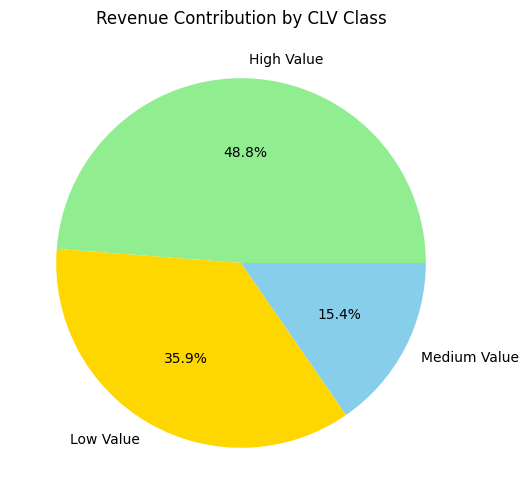

In [ ]:
# Calculate revenue contribution by CLV class
clv_revenue_contribution = customer_revenue.groupby('CLV_Class')['Revenue'].sum()

# Plot the revenue contribution
plt.figure(figsize=(8, 6))
clv_revenue_contribution.plot(kind='pie', autopct='%1.1f%%', colors=['lightgreen', 'gold', 'skyblue'])
plt.title("Revenue Contribution by CLV Class")
plt.ylabel("")  # Hide y-axis label
plt.show()


In [ ]:
import pandas as pd

# Load the dataset from the file
customer_data = pd.read_excel('CustomersData.xlsx')
print("customer_data successfully loaded.")

customer_data successfully loaded.


In [ ]:
print(customer_data.columns)

Index(['CustomerID', 'Gender', 'Location', 'Tenure_Months'], dtype='object')


Calculate Average Days Per Transaction

In [ ]:
# Ensure Transaction_Date is in datetime format
online_sales['Transaction_Date'] = pd.to_datetime(online_sales['Transaction_Date'])

# Sort data by CustomerID and Transaction_Date
online_sales = online_sales.sort_values(['CustomerID', 'Transaction_Date'])

# Calculate days between transactions
online_sales['Days_Between'] = online_sales.groupby('CustomerID')['Transaction_Date'].diff().dt.days

# Filter only repeat customers (non-NaN Days_Between)
repeat_customers = online_sales[~online_sales['Days_Between'].isna()].copy()

# Calculate average days per transaction for each repeat customer
customer_days = repeat_customers.groupby('CustomerID')['Days_Between'].mean().reset_index()
customer_days.rename(columns={'Days_Between': 'Avg_Days_Per_Transaction'}, inplace=True)


Categorize Customers

In [ ]:
# Categorize customers into groups based on Avg_Days_Per_Transaction
bins = [0, 30, 60, 90, np.inf]
labels = ['0-30 days', '30-60 days', '60-90 days', '90+ days']
customer_days['Purchase_Category'] = pd.cut(customer_days['Avg_Days_Per_Transaction'], bins=bins, labels=labels)

# Preview the categories
print(customer_days.head())


   CustomerID  Avg_Days_Per_Transaction Purchase_Category
0       12346                  0.000000               NaN
1       12347                  3.779661         0-30 days
2       12348                  5.409091         0-30 days
3       12350                  0.000000               NaN
4       12356                  0.000000               NaN


Merge customer_days (with Purchase_Category) into customer_data

In [ ]:
# Drop the existing Purchase_Category column if it exists
if 'Purchase_Category' in customer_data.columns:
    customer_data = customer_data.drop(columns=['Purchase_Category'])

# Now perform the merge
customer_data = customer_data.merge(customer_days[['CustomerID', 'Purchase_Category']], on='CustomerID', how='left')

# Preview the updated DataFrame
print(customer_data.head())


   CustomerID Gender    Location  Tenure_Months Purchase_Category
0       17850      M     Chicago             12         0-30 days
1       13047      M  California             43         0-30 days
2       12583      M     Chicago             33         0-30 days
3       13748      F  California             30               NaN
4       15100      M  California             49        30-60 days


In [ ]:
print(customer_data[['CustomerID', 'Tenure_Months', 'Purchase_Category']].head())

   CustomerID  Tenure_Months Purchase_Category
0       17850             12         0-30 days
1       13047             43         0-30 days
2       12583             33         0-30 days
3       13748             30               NaN
4       15100             49        30-60 days


Summarize the Categories

Count customers in each purchase category

In [ ]:
category_counts = customer_data['Purchase_Category'].value_counts()

In [ ]:
print("Customer Distribution by Purchase Category:")
print(category_counts)

Customer Distribution by Purchase Category:
Purchase_Category
0-30 days     717
30-60 days     11
90+ days        5
60-90 days      1
Name: count, dtype: int64


Visualize the distribution

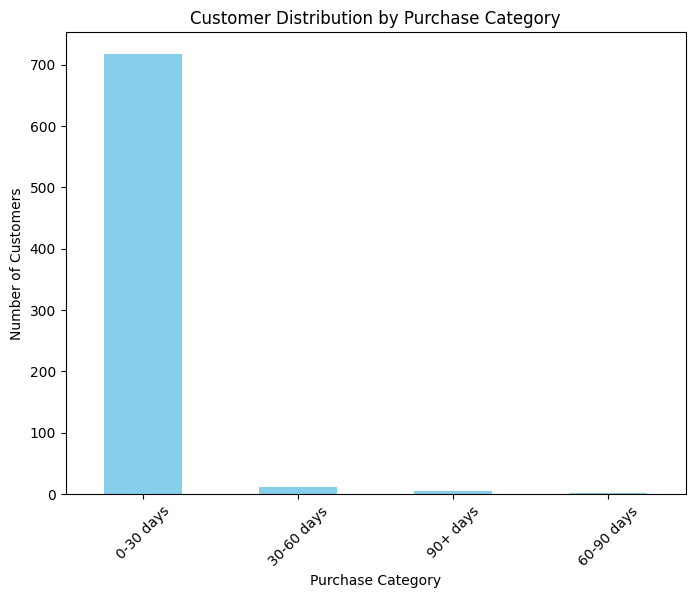

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
category_counts.plot(kind='bar', color='skyblue')
plt.title("Customer Distribution by Purchase Category")
plt.xlabel("Purchase Category")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45)
plt.show()

Prepare Features for Classification

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Load datasets (update paths as needed)
online_sales = pd.read_csv('Online_Sales.csv')
customers_data = pd.read_excel('CustomersData.xlsx')

# Preprocess the Online Sales dataset
online_sales["Transaction_Date"] = pd.to_datetime(online_sales["Transaction_Date"])
online_sales = online_sales.sort_values(by=["CustomerID", "Transaction_Date"])
online_sales["Days_Between"] = online_sales.groupby("CustomerID")["Transaction_Date"].diff().dt.days

# Calculate average days between transactions
repeat_customers = (
    online_sales.groupby("CustomerID")["Days_Between"]
    .mean()
    .dropna()
    .reset_index()
)
repeat_customers.rename(columns={"Days_Between": "Avg_Days_Between"}, inplace=True)

# Create purchase categories
bins = [0, 30, 60, 90, np.inf]
labels = ["0-30 days", "30-60 days", "60-90 days", "90+ days"]
repeat_customers["Purchase_Category"] = pd.cut(
    repeat_customers["Avg_Days_Between"], bins=bins, labels=labels, right=False
)

# Merge with customer data
classified_data = repeat_customers.merge(customers_data, on="CustomerID", how="left")

# Combine infrequent categories into "30+ days"
classified_data["Purchase_Category_Updated"] = classified_data["Purchase_Category"].replace(
    {"30-60 days": "30+ days", "60-90 days": "30+ days", "90+ days": "30+ days"}
)

# Prepare features and labels
X = classified_data[["Avg_Days_Between", "Tenure_Months"]]
y = classified_data["Purchase_Category_Updated"]

# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded)

# Train Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Predict and evaluate
y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

# Print evaluation results
print(f"Accuracy: {accuracy}\n")
print(f"Classification Report:\n{report}")


<ipython-input-53-c4a3aad14299>:38: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  classified_data["Purchase_Category_Updated"] = classified_data["Purchase_Category"].replace(


Accuracy: 1.0

Classification Report:
              precision    recall  f1-score   support

   0-30 days       1.00      1.00      1.00       416
    30+ days       1.00      1.00      1.00         5

    accuracy                           1.00       421
   macro avg       1.00      1.00      1.00       421
weighted avg       1.00      1.00      1.00       421



# **Predicting Next Purchase Day**

Calculate Average Days Per Transaction

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

In [ ]:
customer_data = pd.read_excel('CustomersData.xlsx')

In [ ]:
# Ensure Transaction_Date is in datetime format
online_sales['Transaction_Date'] = pd.to_datetime(online_sales['Transaction_Date'])

# Sort data by CustomerID and Transaction_Date
online_sales = online_sales.sort_values(['CustomerID', 'Transaction_Date'])

# Calculate days between transactions
online_sales['Days_Between'] = online_sales.groupby('CustomerID')['Transaction_Date'].diff().dt.days

# Filter only repeat customers (non-NaN Days_Between)
repeat_customers = online_sales[~online_sales['Days_Between'].isna()].copy()

# Calculate average days per transaction for each repeat customer
customer_days = repeat_customers.groupby('CustomerID')['Days_Between'].mean().reset_index()
customer_days.rename(columns={'Days_Between': 'Avg_Days_Per_Transaction'}, inplace=True)


Categorize Customers

In [ ]:
# Categorize customers into groups based on Avg_Days_Per_Transaction
bins = [0, 30, 60, 90, np.inf]
labels = ['0-30 days', '30-60 days', '60-90 days', '90+ days']
customer_days['Purchase_Category'] = pd.cut(customer_days['Avg_Days_Per_Transaction'], bins=bins, labels=labels)

# Preview the categories
print(customer_days.head())


   CustomerID  Avg_Days_Per_Transaction Purchase_Category
0       12346                  0.000000               NaN
1       12347                  3.779661         0-30 days
2       12348                  5.409091         0-30 days
3       12350                  0.000000               NaN
4       12356                  0.000000               NaN


Merge customer_days (with Purchase_Category) into customer_data

In [ ]:
# Drop the existing Purchase_Category column if it exists
if 'Purchase_Category' in customer_data.columns:
    customer_data = customer_data.drop(columns=['Purchase_Category'])

# Now perform the merge
customer_data = customer_data.merge(customer_days[['CustomerID', 'Purchase_Category']], on='CustomerID', how='left')

# Preview the updated DataFrame
print(customer_data.head())


   CustomerID Gender    Location  Tenure_Months Purchase_Category
0       17850      M     Chicago             12         0-30 days
1       13047      M  California             43         0-30 days
2       12583      M     Chicago             33         0-30 days
3       13748      F  California             30               NaN
4       15100      M  California             49        30-60 days


In [ ]:
print(customer_data.columns)

Index(['CustomerID', 'Gender', 'Location', 'Tenure_Months',
       'Purchase_Category'],
      dtype='object')


Summarize the Categories

Count customers in each purchase category

In [ ]:
category_counts = customer_data['Purchase_Category'].value_counts()

In [ ]:
print("Customer Distribution by Purchase Category:")
print(category_counts)

Customer Distribution by Purchase Category:
Purchase_Category
0-30 days     717
30-60 days     11
90+ days        5
60-90 days      1
Name: count, dtype: int64


Visualize the distribution

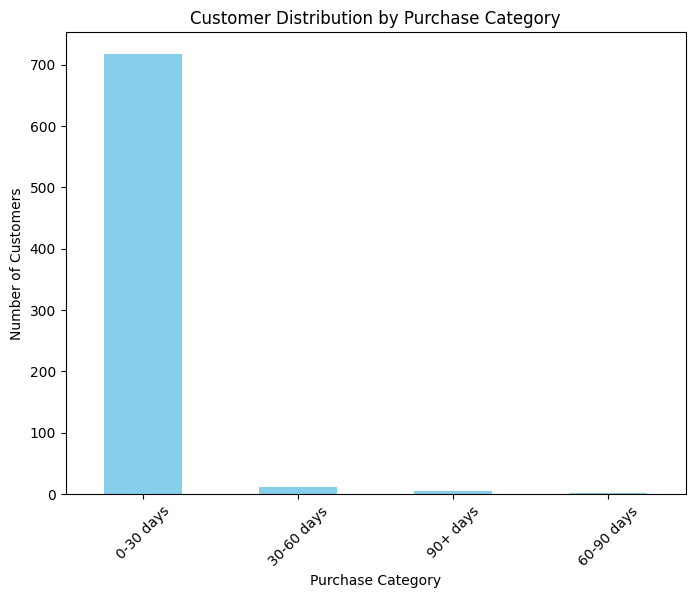

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
category_counts.plot(kind='bar', color='skyblue')
plt.title("Customer Distribution by Purchase Category")
plt.xlabel("Purchase Category")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45)
plt.show()

Prepare Features for Classification

Mean Absolute Error (MAE): 0.05 days


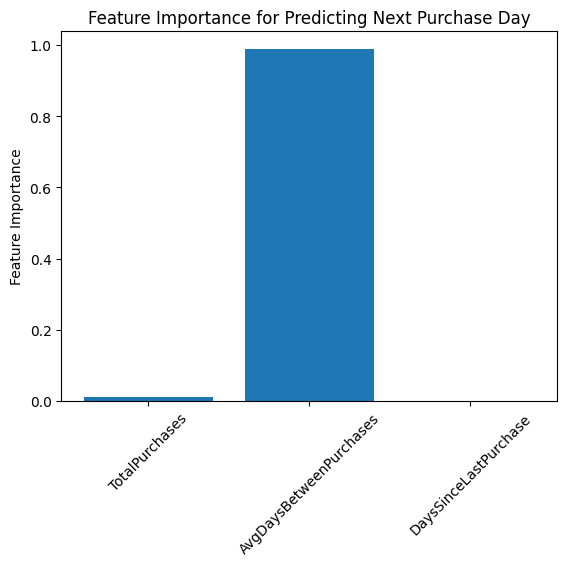

In [ ]:
# Feature Engineering
online_sales_combined['DaysBetweenPurchases'] = (
    online_sales_combined.groupby('CustomerID')['Transaction_Date'].diff().dt.days
)

# Fill missing values for the first transaction
online_sales_combined['DaysBetweenPurchases'] = online_sales_combined['DaysBetweenPurchases'].fillna(
    online_sales_combined['DaysBetweenPurchases'].mean()
)


# Aggregate customer-level features
customer_features = online_sales_combined.groupby('CustomerID').agg({
    'Transaction_Date': ['max', 'count'],
    'DaysBetweenPurchases': 'mean'
}).reset_index()

customer_features.columns = ['CustomerID', 'LastPurchaseDate', 'TotalPurchases', 'AvgDaysBetweenPurchases']

# Add feature for days since last purchase
current_date = online_sales_combined['Transaction_Date'].max()
customer_features['DaysSinceLastPurchase'] = (current_date - customer_features['LastPurchaseDate']).dt.days

# Target variable
customer_features['NextPurchaseDay'] = customer_features['AvgDaysBetweenPurchases']

# Prepare dataset
X = customer_features[['TotalPurchases', 'AvgDaysBetweenPurchases', 'DaysSinceLastPurchase']]
y = customer_features['NextPurchaseDay']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = GradientBoostingRegressor(random_state=42)
model.fit(X_train, y_train)

# Evaluate model
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f} days")

# Plot Feature Importance
importance = model.feature_importances_

plt.bar(X.columns, importance)
plt.ylabel("Feature Importance")
plt.title("Feature Importance for Predicting Next Purchase Day")
plt.xticks(rotation=45)  # Optional: Rotate feature names for better visibility
plt.show()